# LightGBMモデル

In [110]:
import numpy as np
import pandas as pd

In [111]:
train = pd.read_csv('data/train.csv')
predict = pd.read_csv('data/test.csv')

In [112]:
passenger_id = predict[['id']].copy()

In [113]:
predict.describe().T

,count,mean,std,min,25%,50%,75%,max
id,250000.0,874999.500000,72168.927986,750000.00,812499.75,874999.50,937499.25,999999.00
Episode_Length_minutes,221264.0,419.298741,166854.502468,2.47,35.78,63.97,94.15,78486264.00
Host_Popularity_percentage,250000.0,59.716491,22.880028,2.49,39.25,59.90,79.39,117.76
Guest_Popularity_percentage,201168.0,52.192796,28.445034,0.00,28.32,53.36,76.56,116.82
Number_of_Ads,250000.0,1.355852,4.274399,0.00,0.00,1.00,2.00,2063.00


In [114]:
train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [115]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,750000.0,374999.500000,216506.495284,0.0,187499.75000,374999.50000,562499.25000,749999.00
Episode_Length_minutes,662907.0,64.504738,32.969603,0.0,35.73000,63.84000,94.07000,325.24
Host_Popularity_percentage,750000.0,59.859901,22.873098,1.3,39.41000,60.05000,79.53000,119.46
Guest_Popularity_percentage,603970.0,52.236449,28.451241,0.0,28.38000,53.58000,76.60000,119.91
Number_of_Ads,749999.0,1.348855,1.151130,0.0,0.00000,1.00000,2.00000,103.91
Listening_Time_minutes,750000.0,45.437406,27.138306,0.0,23.17835,43.37946,64.81158,119.97


In [116]:
predict.isnull().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [117]:
train.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [119]:
train.nunique()

id                             750000
Podcast_Name                       48
Episode_Title                     100
Episode_Length_minutes          12268
Genre                              10
Host_Popularity_percentage       8038
Publication_Day                     7
Publication_Time                    4
Guest_Popularity_percentage     10019
Number_of_Ads                      12
Episode_Sentiment                   3
Listening_Time_minutes          42807
dtype: int64

In [120]:
train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


# Preprocessing of data

In [121]:
def create_features(df):
    df[['Episode_Name','Episode_Num']] = df['Episode_Title'].str.split(' ', expand=True)
    df['Episode_Num'] = df['Episode_Num'].astype(int)

    # ジャンルごとにホストの人気度の平均を計算して，それを辞書型に変換
    #genre_to_weight = df.groupby('Genre')['Host_Popularity_percentage'].mean().to_dict()
    #df['Host_Popularity_by_Genre'] =  df['Host_Popularity_percentage'] * df['Genre'].map(genre_to_weight)
    """
    # 広告数とホスト人気の関係    
    ads_to_weight = df.groupby('Number_of_Ads')['Host_Popularity_percentage'].mean().to_dict()
    df['Host_Popularity_by_Ads'] =  df['Host_Popularity_percentage'] * df['Number_of_Ads'].map(ads_to_weight)
    
    # 視聴時間の長さ / 広告数
    ads_to_weight = df.groupby('Number_of_Ads')['Episode_Length_minutes'].mean().to_dict()
    df['Episode_Ads'] =  df['Episode_Length_minutes'] / df['Number_of_Ads'].map(ads_to_weight)

    
    """
    # ホストの人気 ＊ エピソードの長さ
    #df['Host_Popularity_by_Episode_Length'] = df['Host_Popularity_percentage'] * df['Episode_Length_minutes']

    # ホスト人気 * ゲスト人気
    #df['Host_Guest_Popularity'] = df['Host_Popularity_percentage'] * df['Guest_Popularity_percentage']
    
    return df

#train = create_features(train)
#predict = create_features(predict)

In [122]:
train.nunique()

id                             750000
Podcast_Name                       48
Episode_Title                     100
Episode_Length_minutes          12268
Genre                              10
Host_Popularity_percentage       8038
Publication_Day                     7
Publication_Time                    4
Guest_Popularity_percentage     10019
Number_of_Ads                      12
Episode_Sentiment                   3
Listening_Time_minutes          42807
dtype: int64

In [123]:
# columns to drop 
def delete_columns(df):
    df.drop(columns=['id'], inplace=True)
    return df

train = delete_columns(train)
predict = delete_columns(predict)

## 異常値の処理

In [124]:
def clean_abnormal_values(df):
    
    # 100%以上はクリップ（`.loc` を使って変更）
    df.loc[:, 'Host_Popularity_percentage'] = df['Host_Popularity_percentage'].clip(upper=100)
    df.loc[:, 'Guest_Popularity_percentage'] = df['Guest_Popularity_percentage'].clip(upper=100)

    df.loc[:, 'Episode_Length_minutes'] = df['Episode_Length_minutes'].clip(upper=125)
    df.loc[:, 'Number_of_Ads'] = df['Number_of_Ads'].clip(upper=12)
    
    return df

# train と predict に適用
train = clean_abnormal_values(train)
predict = clean_abnormal_values(predict)

In [125]:
train.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [126]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Episode_Length_minutes,662907.0,64.504436,32.968132,0.0,35.73000,63.84000,94.07000,125.00
Host_Popularity_percentage,750000.0,59.859482,22.872221,1.3,39.41000,60.05000,79.53000,100.00
Guest_Popularity_percentage,603970.0,52.236124,28.450622,0.0,28.38000,53.58000,76.60000,100.00
Number_of_Ads,749999.0,1.348012,1.111574,0.0,0.00000,1.00000,2.00000,12.00
Listening_Time_minutes,750000.0,45.437406,27.138306,0.0,23.17835,43.37946,64.81158,119.97


In [127]:
"""
from sklearn.preprocessing import RobustScaler

def normalize_data(df):
    scaler = RobustScaler()
    # スケーリングを行うカラムを指定
    #columns_to_scale = ['Episode_Length_minutes', 'Number_of_Ads']
    columns_to_scale = ['Episode_Length_minutes']
    
    # スケーリングを実行
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    
    return df

train = normalize_data(train)
predict = normalize_data(predict)
#"""


"\nfrom sklearn.preprocessing import RobustScaler\n\ndef normalize_data(df):\n    scaler = RobustScaler()\n    # スケーリングを行うカラムを指定\n    #columns_to_scale = ['Episode_Length_minutes', 'Number_of_Ads']\n    columns_to_scale = ['Episode_Length_minutes']\n\n    # スケーリングを実行\n    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])\n\n    return df\n\ntrain = normalize_data(train)\npredict = normalize_data(predict)\n#"

In [128]:
train.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


# Data preparation before modeling

### Since there are few tpyes of object data,label encoding will be applied


In [129]:
"""
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(train_df, predict_df, columns):
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # ←ここを修正

    # 学習データにフィットして変換
    ohe.fit(train_df[columns])
    train_encoded = ohe.transform(train_df[columns])
    predict_encoded = ohe.transform(predict_df[columns])

    # 新しい列名を取得（カテゴリ名付き）
    ohe_columns = ohe.get_feature_names_out(columns)

    # DataFrameに変換
    train_encoded_df = pd.DataFrame(train_encoded, columns=ohe_columns, index=train_df.index)
    predict_encoded_df = pd.DataFrame(predict_encoded, columns=ohe_columns, index=predict_df.index)

    # 元の列を削除してエンコードした列を結合
    train_df = train_df.drop(columns=columns).join(train_encoded_df)
    predict_df = predict_df.drop(columns=columns).join(predict_encoded_df)

    return train_df, predict_df


# One-Hot Encoding の対象列
encoding_cols = ['Publication_Day',
                 'Publication_Time', 'Episode_Sentiment']

train, predict = one_hot_encoding(train, predict, encoding_cols)
#"""

"\nfrom sklearn.preprocessing import OneHotEncoder\n\ndef one_hot_encoding(train_df, predict_df, columns):\n    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # ←ここを修正\n\n    # 学習データにフィットして変換\n    ohe.fit(train_df[columns])\n    train_encoded = ohe.transform(train_df[columns])\n    predict_encoded = ohe.transform(predict_df[columns])\n\n    # 新しい列名を取得（カテゴリ名付き）\n    ohe_columns = ohe.get_feature_names_out(columns)\n\n    # DataFrameに変換\n    train_encoded_df = pd.DataFrame(train_encoded, columns=ohe_columns, index=train_df.index)\n    predict_encoded_df = pd.DataFrame(predict_encoded, columns=ohe_columns, index=predict_df.index)\n\n    # 元の列を削除してエンコードした列を結合\n    train_df = train_df.drop(columns=columns).join(train_encoded_df)\n    predict_df = predict_df.drop(columns=columns).join(predict_encoded_df)\n\n    return train_df, predict_df\n\n\n# One-Hot Encoding の対象列\nencoding_cols = ['Publication_Day',\n                 'Publication_Time', 'Episode_Sentiment']\n\ntrain, 

In [130]:
"""
from sklearn.model_selection import KFold
import numpy as np

def kfold_target_encoding(train_df, predict_df, columns, target_col, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for col in columns:
        train_df[col + '_te'] = np.nan
        for train_index, val_index in kf.split(train_df):
            tr, val = train_df.iloc[train_index], train_df.iloc[val_index]
            means = tr.groupby(col)[target_col].mean()
            train_df.loc[val.index, col + '_te'] = val[col].map(means)

        # テスト（予測）データには全体平均からマップ
        global_means = train_df.groupby(col)[target_col].mean()
        global_mean = train_df[target_col].mean()
        predict_df[col + '_te'] = predict_df[col].map(global_means).fillna(global_mean)

        # 元の列を削除するならここで
        train_df.drop(columns=[col], inplace=True)
        predict_df.drop(columns=[col], inplace=True)

    return train_df, predict_df

encoding_cols = ['Podcast_Name',
                 'Episode_Title']

# 例：目的変数が 'Target' というカラム名であると仮定
train, predict = kfold_target_encoding(train, predict, encoding_cols, target_col='Listening_Time_minutes')
#"""


"\nfrom sklearn.model_selection import KFold\nimport numpy as np\n\ndef kfold_target_encoding(train_df, predict_df, columns, target_col, n_splits=5):\n    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)\n\n    for col in columns:\n        train_df[col + '_te'] = np.nan\n        for train_index, val_index in kf.split(train_df):\n            tr, val = train_df.iloc[train_index], train_df.iloc[val_index]\n            means = tr.groupby(col)[target_col].mean()\n            train_df.loc[val.index, col + '_te'] = val[col].map(means)\n\n        # テスト（予測）データには全体平均からマップ\n        global_means = train_df.groupby(col)[target_col].mean()\n        global_mean = train_df[target_col].mean()\n        predict_df[col + '_te'] = predict_df[col].map(global_means).fillna(global_mean)\n\n        # 元の列を削除するならここで\n        train_df.drop(columns=[col], inplace=True)\n        predict_df.drop(columns=[col], inplace=True)\n\n    return train_df, predict_df\n\nencoding_cols = ['Podcast_Name',\n         

In [131]:
#"""
# Label Encoding
from sklearn.preprocessing import LabelEncoder

def label_enocding(df,columns):
    le = LabelEncoder()

    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

encoding_cols = ['Podcast_Name','Genre','Publication_Day',
                 'Publication_Time','Episode_Sentiment','Episode_Title']
#encoding_cols = ['Podcast_Name','Episode_Title','Genre']
                 
train = label_enocding(train, encoding_cols)
predict = label_enocding(predict, encoding_cols)
#"""


In [132]:
train.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,34,98,NaN,9,74.81,4,3,NaN,0.0,2,31.41998
1,24,19,119.80,1,66.95,2,0,75.95,2.0,0,88.01241
2,40,8,73.90,2,69.97,5,1,8.97,0.0,0,44.92531
3,10,40,67.17,8,57.22,1,2,78.70,2.0,2,46.27824
4,31,85,110.51,3,80.07,1,0,58.68,3.0,1,75.61031


In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 750000 non-null  int64  
 1   Episode_Title                750000 non-null  int64  
 2   Episode_Length_minutes       662907 non-null  float64
 3   Genre                        750000 non-null  int64  
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  int64  
 6   Publication_Time             750000 non-null  int64  
 7   Guest_Popularity_percentage  603970 non-null  float64
 8   Number_of_Ads                749999 non-null  float64
 9   Episode_Sentiment            750000 non-null  int64  
 10  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 62.9 MB


In [134]:
from sklearn.model_selection import train_test_split

def split_data(df, test_size=0.2, random_state=42):
    X = df.drop(columns=['Listening_Time_minutes'])
    y = df['Listening_Time_minutes']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(train)
predict_X = predict.copy()

In [135]:
train.nunique()

Podcast_Name                      48
Episode_Title                    100
Episode_Length_minutes         12268
Genre                             10
Host_Popularity_percentage      8020
Publication_Day                    7
Publication_Time                   4
Guest_Popularity_percentage    10004
Number_of_Ads                      5
Episode_Sentiment                  3
Listening_Time_minutes         42807
dtype: int64

# Model Construction

In [136]:
import lightgbm as lgb

# LightGBMモデルの構築
def build_lightgbm_model(n_estimators=100, max_depth=5, learning_rate=0.1):
    """LightGBMモデルを構築する関数（回帰）"""
    model = lgb.LGBMRegressor(
        objective='regression',  # 回帰タスク用
        n_estimators=n_estimators,  # 決定木の数
        max_depth=max_depth,  # 木の深さ
        learning_rate=learning_rate,  # 学習率
        random_state=42  # 再現性のためのシード
    )
    return model

# 特徴量と目的変数
lgb_X_train = X_train
lgb_X_test = X_test

# モデルの構築
lgb_model = build_lightgbm_model()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


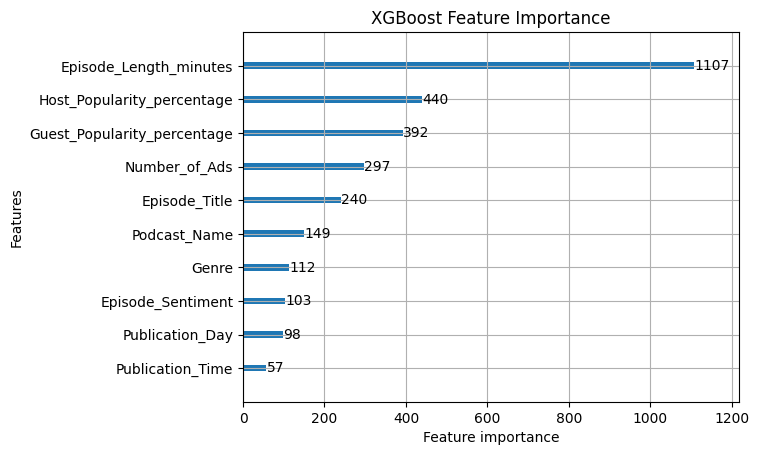

In [137]:
import matplotlib.pyplot as plt

# Train XGBoost model
lgb_model.fit(X_train, y_train) # XGBoostモデルの学習

# Feature importance
lgb.plot_importance(lgb_model) # 特徴量の重要度をプロット
plt.title('XGBoost Feature Importance') # タイトル
plt.show() # グラフの表示

# Model evalution

In [138]:
lgb_pred = lgb_model.predict(X_test)

In [139]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_metrics(y_true,y_pred):
    
    results = []

    def calulate_metrics(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        return {
            'MSE': mse,
            'RMSE': mae,
            'R2': r2
        }
    results.append(calulate_metrics(y_true, y_pred))

    return pd.DataFrame(results)

results = evaluate_metrics(y_test, lgb_pred)
display(results)

,MSE,RMSE,R2
0,170.722464,9.513633,0.767986


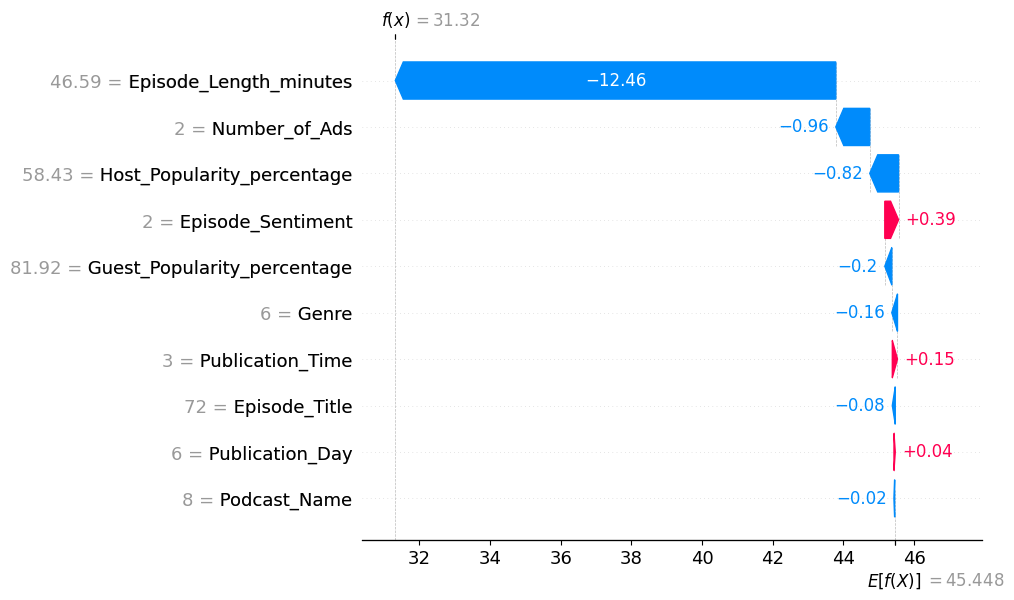

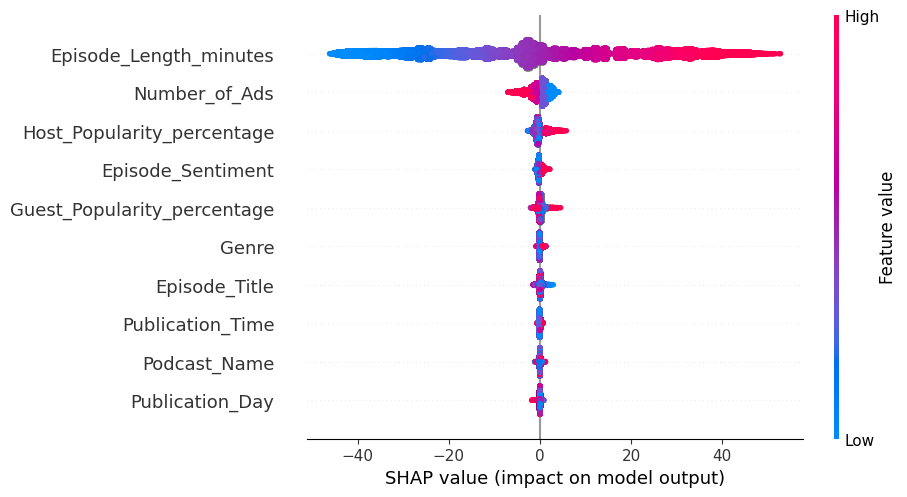

In [140]:
import shap

def explain_model(model):
    # SHAP explainerを作成（TreeExplainerはXGBoostなどに最適）
    explainer = shap.Explainer(model)

    # SHAP値を計算（X_testに対して）
    shap_values = explainer(X_test)

    # 可視化（例：1件目の予測理由）
    shap.plots.waterfall(shap_values[0])

    # 全体の特徴量の影響（要約プロット）
    shap.plots.beeswarm(shap_values)

explain_model(lgb_model)


# Optuna

In [141]:
#"""
import optuna
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Optunaで最適化する関数
def optimize_lightgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500), # 決定木の数
        'max_depth': trial.suggest_int('max_depth', 3, 10), # 決定木の深さ
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3), # 学習率
        'subsample': trial.suggest_float('subsample', 0.6, 1.0), # サブサンプル
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0), # 列のサブサンプル
        'num_leaves': trial.suggest_int('num_leaves', 31, 128), # 最大葉の数
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100), # 葉ノードが持つ最小サンプル数
        'objective': 'regression', # 回帰タスクに適した損失関数
        'random_state': 42
    }

    # LightGBMモデルの学習
    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)

    # 予測と評価
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Optunaによる最適化
study = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.INFO)
study.optimize(optimize_lightgbm, n_trials=5)

# 最良のトライアル結果を表示
print('Best trial:')
trial = study.best_trial  # 最良のトライアル
print(f"  MSE: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# 最良のパラメータでモデルを最適化
optimized_lgb = lgb.LGBMRegressor(**trial.params, random_state=42)
optimized_lgb.fit(X_train, y_train)
#"""

[I 2025-04-22 21:22:59,163] A new study created in memory with name: no-name-9e8ed73c-8dbd-45f1-906c-37aaa654e79d


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808


[I 2025-04-22 21:23:00,939] Trial 0 finished with value: 169.0011370045669 and parameters: {'n_estimators': 95, 'max_depth': 10, 'learning_rate': 0.1977732114124267, 'subsample': 0.8718490457423347, 'colsample_bytree': 0.7197902088432251, 'num_leaves': 73, 'min_child_samples': 28}. Best is trial 0 with value: 169.0011370045669.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808


[I 2025-04-22 21:23:06,014] Trial 1 finished with value: 169.9764393053019 and parameters: {'n_estimators': 203, 'max_depth': 8, 'learning_rate': 0.03247523843746608, 'subsample': 0.9456601428614826, 'colsample_bytree': 0.7014107962650722, 'num_leaves': 104, 'min_child_samples': 39}. Best is trial 0 with value: 169.0011370045669.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-04-22 21:23:06,555] Trial 2 finished with value: 171.20463169784577 and parameters: {'n_estimators': 76, 'max_depth': 4, 'learning_rate': 0.21531347502504375, 'subsample': 0.9950754273330397, 'colsample_bytree': 0.8266002960343483, 'num_leaves': 38, 'min_child_samples': 80}. Best is trial 0 with value: 169.0011370045669.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-04-22 21:23:07,852] Trial 3 finished with value: 170.273794759273 and parameters: {'n_estimators': 212, 'max_depth': 4, 'learning_rate': 0.16288596373813186, 'subsample': 0.8755989647147528, 'colsample_bytree': 0.6885402552429996, 'num_leaves': 51, 'min_child_samples': 95}. Best is trial 0 with value: 169.0011370045669.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2025-04-22 21:23:10,789] Trial 4 finished with value: 169.43338713979048 and parameters: {'n_estimators': 330, 'max_depth': 5, 'learning_rate': 0.07372495761487827, 'subsample': 0.6690334650569125, 'colsample_bytree': 0.912051629162173, 'num_leaves': 115, 'min_child_samples': 28}. Best is trial 0 with value: 169.0011370045669.


Best trial:
  MSE: 169.0011370045669
  Params: 
    n_estimators: 95
    max_depth: 10
    learning_rate: 0.1977732114124267
    subsample: 0.8718490457423347
    colsample_bytree: 0.7197902088432251
    num_leaves: 73
    min_child_samples: 28
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 10
[LightGBM] [Info] Start training from score 45.447808


LGBMRegressor(colsample_bytree=0.7197902088432251,
              learning_rate=0.1977732114124267, max_depth=10,
              min_child_samples=28, n_estimators=95, num_leaves=73,
              random_state=42, subsample=0.8718490457423347)

In [142]:
optimized_pred = optimized_lgb.predict(X_test)
optimized_metrics = evaluate_metrics(y_test,  optimized_pred) # 評価
display(optimized_metrics)

,MSE,RMSE,R2
0,169.001137,9.467623,0.770325


In [143]:
import joblib

# 保存
#joblib.dump(optimized_lgb, "model/lightgbm/lgb_model_2.pkl")

# 読み込み
#loaded_model = joblib.load("model/lightgbm/lgb_model_1.pkl")

# 推論もOK
#y_pred = loaded_model.predict(X_test)


['model/lightgbm/lgb_model_2.pkl']

In [144]:
predixt_y = optimized_lgb.predict(predict_X)

predict_df = pd.DataFrame(predixt_y , columns=['Listening_Time_minutes'])

submission = pd.concat([passenger_id, predict_df], axis=1)

display(submission.head())

,id,Listening_Time_minutes
0,750000,56.234922
1,750001,18.071267
2,750002,50.397593
3,750003,76.968783
4,750004,49.100321


In [145]:
submission.shape

(250000, 2)

In [146]:
submission.isnull().sum()

id                        0
Listening_Time_minutes    0
dtype: int64

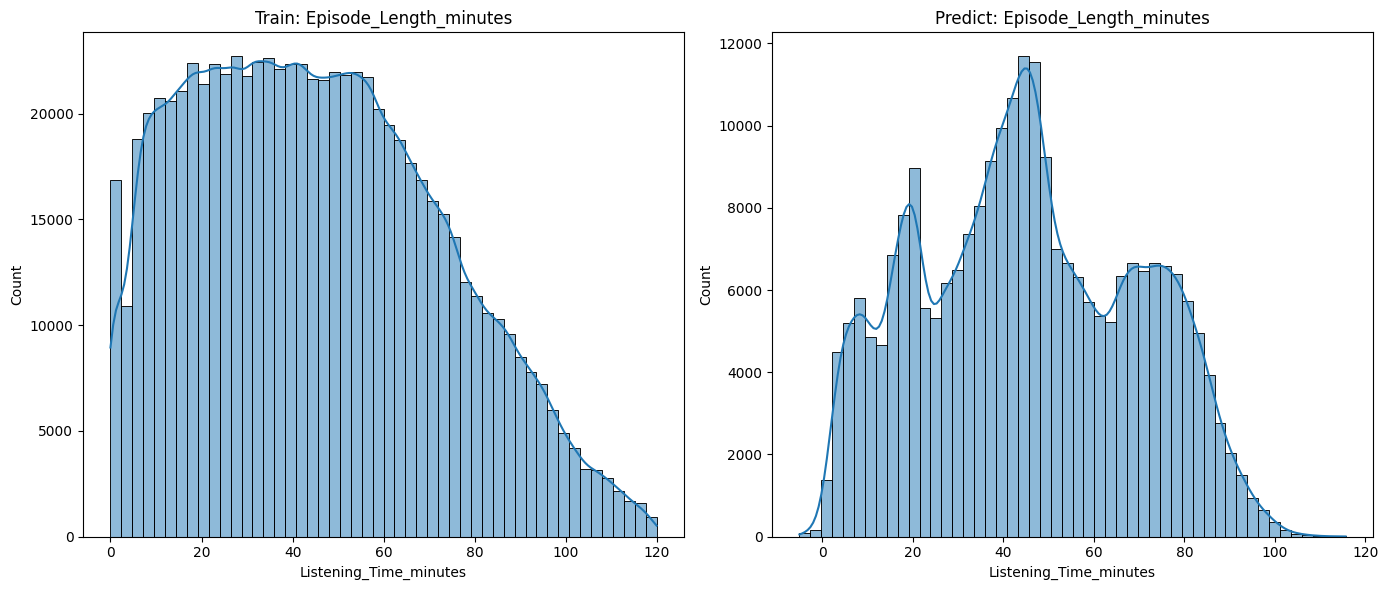

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# サブプロットの準備（横に2つ）
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# train データのヒストグラム + KDE
sns.histplot(train['Listening_Time_minutes'].dropna(), kde=True, bins=50, ax=axs[0])
axs[0].set_title('Train: Episode_Length_minutes')
#axs[0].set_xlabel('Episode_Length_minutes')

# predict データのヒストグラム + KDE
sns.histplot(submission['Listening_Time_minutes'].dropna(), kde=True, bins=50, ax=axs[1])
axs[1].set_title('Predict: Episode_Length_minutes')
#axs[1].set_xlabel('Episode_Length_minutes')

# レイアウト調整して表示
plt.tight_layout()
plt.show()

In [148]:
#submission.to_csv('submit/lgb_submit/lgb_submit1.csv', index=False)